**Project 1 - SHARKS - ANALYSIS jupyter notebook**

# Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

# Hypotheses

- Based on reports by activity and fatality, we could identify the *top10 most lethal activities.*
- Based on reports by month and country, it would be possible to identify a 'Shark season' i. e. the months were most attacks occur, which might as well be related to migratory events. Has these changed over the years? -> Global warming, climate change.

# Analysis (& further cleaning of chosen variables)

In [3]:
# Importing first cleaned version of the dataset
sharks_clean = pd.read_csv('./data/sharks_clean.csv', encoding = "unicode_escape")

In [4]:
sharks_clean.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [5]:
sharks_clean.shape 
# Based on previous cleaning, I'm sure that these reports have at least 50% of information
# Since they had non-NaN in 8 out of 16 columns

(6302, 16)

## Top 10 deathliest sports: Activity vs Fatality

### Cleaning Activity

In [6]:
# Checking Nan
sharks_clean['Activity'].isna().sum()

544

In [7]:
# Removing Nan
sharks_clean = sharks_clean[sharks_clean['Activity'].notna()]
sharks_clean.shape

(5758, 16)

In [8]:
# Having a look
sharks_clean['Activity'].value_counts().head(10)

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

Some activities could be grouped: same activity but with '-' in between words, lower cases.
Might be a good idea to group activities by different categories. For instance:
- Everything that involves surfing on a board together. Boogie and bodie boarding is also surfing.
- Everything that involves kayaking together. Include canoeing. Include rowing.
- Fishing together
- All diving related sports together.
- Wading and walking together.  


In [9]:
# Cleaning inconsistencies
sharks_clean["Activity"] = sharks_clean["Activity"].str.replace("-"," ").str.lower().str.strip()

In [10]:
# Cast to list to do group using regex
list_activity = sharks_clean["Activity"].unique().tolist()

In [11]:
# print(list_activity)

Let's use regex to group the different activities

In [12]:
# 1. Write a dictionary of activities (regex pattern in value) 
# 2. Do a for loop to replace by the key when pattern identified.

dict_activity_regex = {"Board surfing" : ".*(surf).*|.*(boogie board).*|.*(body board).*",
                      "Kayaking & similar" : ".*(kayak).*|.*(canoe).*|.*(rowing).*",
                      "Diving" : ".*(diving).*",
                       "Paddle boarding" : ".*(paddle).*",
                      "Sailing" : ".*(boat).*|.*(sail).*|.*(ship).*|.*(overboard).*",
                      "Snorkeling" : ".*(snorkel).*",
                      "Swimming" : ".*(bathing).*|.*(swimming).*|.*(float).*",
                      "Spear-fishing" : ".*(spearfishing).*",
                      "Fishing" : "[\w\s]+?(fishing).*|^(fishing).*",
                      "Wading" : ".*wad.*|.*(walking).*|.*(standing).*|.*(treading).*"
}

for key, value in dict_activity_regex.items():
    sharks_clean["Activity"] = sharks_clean["Activity"].str.replace(value, key, regex = True)


In [13]:
# Having a look - nice top 10
sharks_clean["Activity"].value_counts().head(10)

Board surfing         1383
Swimming              1269
Fishing                630
Diving                 550
Spear-fishing          380
Sailing                354
Wading                 346
Kayaking & similar     123
Snorkeling             100
Paddle boarding         25
Name: Activity, dtype: int64

In [14]:
# How could I group all the others in one activity called 'other activity'

In [15]:
# Getting all activities and value counts in to a dictionary
# dict_activity = sharks_clean["Activity"].value_counts().to_dict()

In [16]:
# Selecting only those that have value counts < 100 (the "other activities")
# dict_other_activity = {key:val for key, val in dict_activity.items() if val < 100}

In [17]:
# Replacing those that are in dict_other_activity with 'other activity' using apply and lambda
# sharks.clean["Activity"] = sharks_clean["Activity"].apply(lambda x: x.str.replace(x, "other activity") if x in dict_other_activity)

### Cleaning Fatality 

In [18]:
# Checking NaNs
sharks_clean["Fatal (Y/N)"].isna().sum()

414

In [19]:
# Removing NaNs
sharks_clean = sharks_clean[sharks_clean['Fatal (Y/N)'].notna()]
sharks_clean["Fatal (Y/N)"].isna().sum()

0

In [20]:
# Strip spaces and see if we need to remove manually
sharks_clean["Fatal (Y/N)"] = sharks_clean["Fatal (Y/N)"].str.strip().str.upper()
sharks_clean["Fatal (Y/N)"].value_counts()

N          4023
Y          1283
UNKNOWN      36
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [21]:
# Removing if not N or Y
fatal_keep = (sharks_clean["Fatal (Y/N)"] == "N") | (sharks_clean["Fatal (Y/N)"] == "Y")
sharks_clean = sharks_clean[fatal_keep]
sharks_clean["Fatal (Y/N)"].value_counts()

N    4023
Y    1283
Name: Fatal (Y/N), dtype: int64

### Visualization

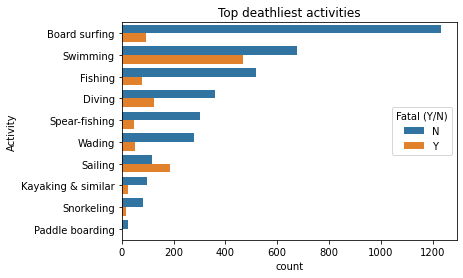

In [22]:
# Plotting
fig_activity = sns.countplot(y="Activity", data=sharks_clean, hue="Fatal (Y/N)", order=sharks_clean.Activity.value_counts().iloc[:10].index)
fig_activity.set(title='Top deathliest activities')

plt.savefig('./images/activity_fatality.jpg', dpi=1000, bbox_inches='tight')

In [23]:
# Exporting clean dataset
sharks_clean.to_csv('./data/sharks_clean_activity_fatal.csv', index = False)

## 'Shark Season' by Month and Country

In [24]:
# Importing again because I deleted empty columns for analysing activities and fatality

sharks_clean = pd.read_csv('./data/sharks_clean.csv', encoding = "unicode_escape")

In [25]:
# Looking at shape
sharks_clean.shape

(6302, 16)

### Extracting and cleaning Month

Which column do I use to extract the month? Case Number and Date contain this information. Let's see which one has less NaN

In [26]:
sharks_clean["Case Number"].isna().sum()

1

In [27]:
sharks_clean["Date"].isna().sum()

0

Basically the same, let's see which one looks cleaner

In [28]:
list_case_number = sharks_clean["Case Number"].tolist()

In [29]:
# print(list_case_number)

In [30]:
list_date = sharks_clean["Date"].tolist() 
# I think it would be better to use this with regex selection [A-Za-z]{3} or similar
# Find those instances in which occur and create new column with the month

In [31]:
# print(list_date)

After checking the list, if they do not follow the regex -(\w{3})- the date is not really clear. Extract these and replace by NaN the others.

In [32]:
# (Jan|Feb|Mar|Apr|Mar|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)

In [33]:
# Extracting month into new column using regex
sharks_clean["Month"] = sharks_clean["Date"].str.lower().str.extract(r'-(\w{3})-')

In [34]:
# Checking new column
sharks_clean.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
1995,2000.10.29,29-Oct-2000,2000.0,Boat,AUSTRALIA,Queensland,Peel Island,Fishing,"boat, occupant: Paul Kelly",NaN,31,"No Injury to occupant, shark holed and sank boat",N,22h00,White shark,"T. Peake, GSAF",oct


In [35]:
# Non identified column (month probably missing) filled with Nan
sharks_clean.tail(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,NaN


In [36]:
# Checking how many values we have
list_month = sharks_clean["Month"].tolist()
len(list_month)

6302

In [37]:
# Checking Nan
sharks_clean["Month"].isna().sum() 
# 910 out of 6302, not that bad - let's remove them

910

In [38]:
# Keeping not Nan
sharks_clean = sharks_clean[sharks_clean['Month'].notna()]
sharks_clean.shape

(5392, 17)

In [39]:
# Checking grouping using new column Month
sharks_clean.groupby("Month").indices.keys() 
# Month: x-axis but would need to recode to order them

dict_keys(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'])

We need the Month to be codified (1-12) so that the months are then properly ordered: create new column where if jan->1, if feb->2...

In [40]:
# Creating a dictionary to store the old and new names for months:

dict_months = {"jan" : 1,
              "feb" : 2,
              "mar" : 3,
              "apr" : 4,
              "may" : 5,
              "jun" : 6,
              "jul" : 7,
              "aug" : 8,
              "sep" : 9,
              "oct" : 10,
              "nov" : 11,
              "dec" : 12              
}

# Replacing the name by value

sharks_clean.replace({"Month" : dict_months}, inplace = True)

In [41]:
sharks_clean.sample() # It worked

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
3787,1962.10.14,14-Oct-1962,1962.0,Boat,AUSTRALIA,South Australia,Port Phillip Bay,Adrift after wave swamped engine,"speedboat, occupant: Michael Wilson",M,NaN,"No injury to occupant, shark ""nibbled"" at boat",N,NaN,Grey nurse shark,"Strand (London), 10/15/1962",10


In [42]:
sharks_clean.groupby("Month").indices.keys() 
# Now they will be automatically ordered in the graph

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [43]:
sharks_clean.groupby("Month").size() 
# Number of reports each month: y-axis

Month
1     494
2     356
3     381
4     420
5     358
6     475
7     621
8     556
9     521
10    417
11    378
12    415
dtype: int64

### Cleaning Country

In [44]:
# Cleaning inconsistencies just in case
sharks_clean["Country"] = sharks_clean["Country"].str.strip().str.upper()

In [45]:
# Checking Nan
sharks_clean["Country"].isna().sum()

31

In [46]:
# Keeping not Nan
sharks_clean = sharks_clean[sharks_clean['Country'].notna()]

In [47]:
# Checking shape
sharks_clean.shape

(5361, 17)

In [48]:
# Having a look
sharks_clean["Country"].value_counts() # Looks messy let's see if we can group something here

USA                         2051
AUSTRALIA                   1227
SOUTH AFRICA                 523
NEW ZEALAND                  111
BRAZIL                       106
                            ... 
ARGENTINA                      1
GUATEMALA                      1
NETHERLANDS ANTILLES           1
MALDIVES                       1
BETWEEN PORTUGAL & INDIA       1
Name: Country, Length: 168, dtype: int64

In [49]:
# sharks_clean["Country"].unique()

In [50]:
# Checking unique country values
list_country = sharks_clean["Country"].unique().tolist() # If I take top 3 looks good
# print(list_country)

### Visualization

Let's plot the counts of reports by month and country

In [51]:
# Defining filtering conditions for top 3 countries:

usa = (sharks_clean["Country"] == "USA")
australia = (sharks_clean["Country"] == "AUSTRALIA")
south_africa = (sharks_clean["Country"] == "SOUTH AFRICA")

In [52]:
# Checking that filters work:

sharks_clean[south_africa].sample() # ok works

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
4185,1957.12.20,20-Dec-1957,1957.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Uvongo,Standing,Allan Green,M,15,"FATAL, multiple, severe injuries",Y,16h00,NaN,"P. Lynch, G. Wolfe, A. Cowan, M.Levine, GSAF",12


In [53]:
# sharks_clean[usa].groupby("Month").size()

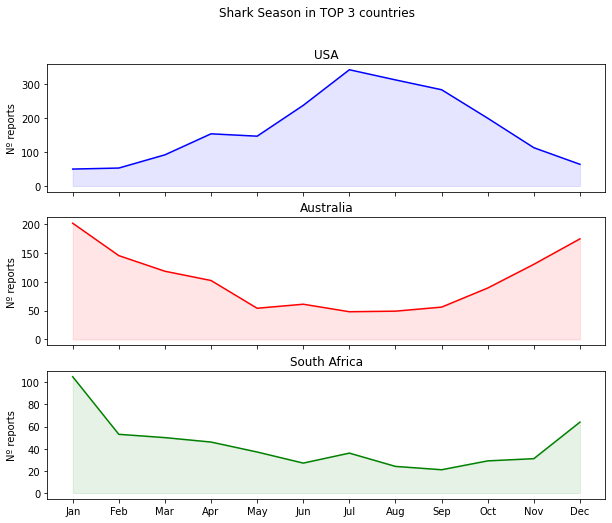

In [54]:
# Plotting
fig_month_country, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(10,8)) # preparing the environment: graphs to be filled

fig_month_country.suptitle('Shark Season in TOP 3 countries')

# x axis:
x = sharks_clean.groupby("Month").indices.keys()
  
# y axes: y1 (top graph - USA), y2 (middle graph - AUSTRALIA), y3 (bottom graph - SOUTH AFRICA):
y1 = sharks_clean[usa].groupby("Month").size()
y2 = sharks_clean[australia].groupby("Month").size()
y3 = sharks_clean[south_africa].groupby("Month").size()

# first graph, USA
plt.sca(ax[0])
plt.plot(x, y1, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('USA')
plt.fill_between(x, y1, alpha = 0.1, color = 'b')

# second graph, AUSTRALIA  
plt.sca(ax[1])
plt.plot(x, y2, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('Australia')
plt.fill_between(x, y2, alpha = 0.1, color = 'r')

# third graph, SOUTH AFRICA  
plt.sca(ax[2])
plt.plot(x, y3, 'g')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('South Africa')
plt.fill_between(x, y3, alpha = 0.1, color = 'g')

plt.show()
fig_month_country.figure.savefig('./images/shark_season_countries.jpg', dpi=1000, bbox_inches='tight')

**Conclusions:** 
- Shark season is Jun-Oct in USA
- Shark season is Dec-Feb in Australia and South Africa
  
We could use this approach to check Shark season in different countries/regions (for instance: East vs West-coast of USA).  

Now, Shark Season might look different in the past, since global warming is affecting their habitats.
Let's see if it changes by year.  
Start of industrialization: year 1760 - but we migt not have many reports on those years.

In [55]:
# Exporting cleaned month-country dataset
sharks_clean.to_csv('./data/sharks_clean_month_country.csv', index = False)

## 'Shark season' by year - Climate change

### Cleaning Year

In [56]:
# Having a look at unique year values
sharks_clean["Year"].unique() 
# We might need to focus on USA & Australia since they have the most reports by month

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [57]:
# sharks_clean["Year"].value_counts()

Let's clean the Year column, just remove the zeros and delete those for which I have no year.  
Also I could bin them in spans of 20 years?

In [58]:
# Convert to int and fill NaN with 0 

try:
    sharks_clean["Year"] = sharks_clean["Year"].astype(int)
except Exception:
    sharks_clean['Year'] = sharks_clean['Year'].fillna(0).astype(int)

In [59]:
# print(sharks_clean.dtypes) # Converted to int

In [60]:
# sharks_clean["Year"].unique() # Filled NaN with 0

In [61]:
# Let's remove the rows in which year = 0

year_zero = sharks_clean['Year'] == 0
sharks_clean = sharks_clean.drop(sharks_clean[year_zero].index)

In [62]:
# sharks_clean.tail(3) # Removed the rows with zeros in year

In [63]:
sharks_clean.shape # Removed

(5352, 17)

### Reports by year (worldwide)

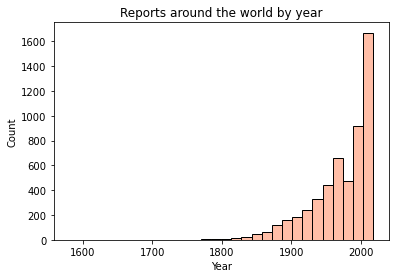

In [64]:
# Let's check the reports by year in the world

fig_reports_year = sns.histplot(x = sharks_clean["Year"], bins = 30, color = "coral", alpha = 0.5).set(title='Reports around the world by year')

plt.savefig('./images/shark_reports_year.jpg', dpi=1000, bbox_inches='tight')

In [65]:
# Exporting cleaned month-year dataset
sharks_clean.to_csv('./data/sharks_clean_month_country_year.csv', index = False)

### Visualization: USA

In [66]:
# Let's create a new dataframe and will just keep those rows where Country == USA

country_USA = sharks_clean['Country'] != "USA"
sharks_clean_USA = sharks_clean.drop(sharks_clean[country_USA].index)

In [67]:
# Looking at shape
sharks_clean_USA.shape

(2049, 17)

In [68]:
# Checking it worked -ok
sharks_clean_USA.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
743,2012.09.06.b,06-Sep-2012,2012,Unprovoked,USA,Florida,"Neptune Beach, Duval County",Surfing,James Fyfe,M,30s,Right calf bitten,N,Just before noon,NaN,"New4Jax, 9/7/2012",9


In [69]:
# Check how many reports by year
list_year_USA = sharks_clean_USA["Year"].tolist()
# print(list_year_USA)

In [70]:
# Grouping reports by years, just to have an idea

count_2018 = 0
count_2000 = 0
count_1980 = 0
count_1960 = 0
count_1940 = 0
count_1920 = 0

for i in list_year_USA:
    if i >= 2000:
        count_2018 +=1
    if i >= 1980 and i < 2000:
        count_2000 +=1
    if i >= 1960 and i < 1980:
        count_1980 +=1
    if i >= 1940 and i < 1960:
        count_1960 +=1
    if i >= 1920 and i < 1940:
        count_1940 +=1
    if i >= 1900 and i < 1920:
        count_1920 +=1

print("Cases 2000-2018:", count_2018, 
      ". Cases 1980-2000:", count_2000, 
      ". Cases 1960-1980:", count_1980, 
      ". Cases 1940-1960:", count_1960, 
      ". Cases 1920-1940:", count_1940, 
      ". Cases 1900-1920:", count_1920,
)

Cases 2000-2018: 997 . Cases 1980-2000: 450 . Cases 1960-1980: 235 . Cases 1940-1960: 124 . Cases 1920-1940: 78 . Cases 1900-1920: 72


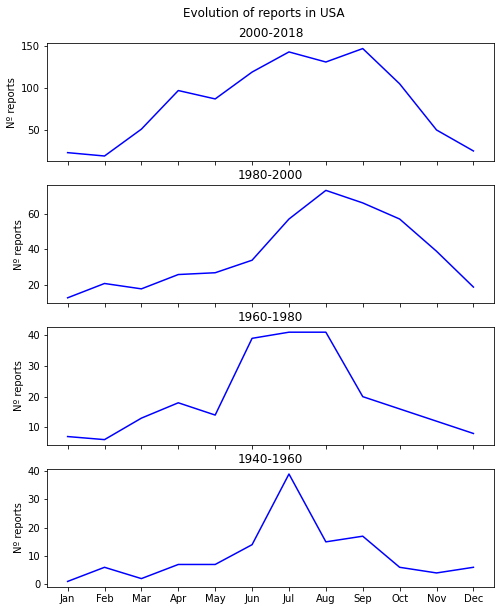

In [71]:
# Plotting
# Let's check the reports by year and month in USA

fig_month_year_USA, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(8,10)) # preparing the environment: graphs to be filled

fig_month_year_USA.suptitle('Evolution of reports in USA', y=0.93)

# conditions:
year_2000_2018 = (sharks_clean_USA["Year"] >= 2000)
year_1980_2000 = (sharks_clean_USA["Year"] >= 1980) & (sharks_clean_USA["Year"] < 2000)
year_1960_1980 = (sharks_clean_USA["Year"] >= 1960) & (sharks_clean_USA["Year"] < 1980)
year_1940_1960 = (sharks_clean_USA["Year"] >= 1940) & (sharks_clean_USA["Year"] < 1960)
year_1920_1940 = (sharks_clean_USA["Year"] >= 1920) & (sharks_clean_USA["Year"] < 1940)
year_1900_1920 = (sharks_clean_USA["Year"] >= 1900) & (sharks_clean_USA["Year"] < 1920)

# x axis:
x = sharks_clean_USA.groupby("Month").indices.keys()
  
# y axes:
y1 = sharks_clean_USA[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_USA[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_USA[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_USA[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_USA[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_USA[year_1900_1920].groupby("Month").size()

# 1st
plt.sca(ax[0])
plt.plot(x, y1, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('2000-2018')

# 2nd
plt.sca(ax[1])
plt.plot(x, y2, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1980-2000')

# 3rd
plt.sca(ax[2])
plt.plot(x, y3, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1960-1980')

# 4th
plt.sca(ax[3])
plt.plot(x, y4, 'b')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('1940-1960')

# 5th
# plt.sca(ax[4])
# plt.plot(x, y5, 'b')
# plt.ylabel(ylabel="Nº reports")
# plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
# plt.title('1920-1940')

plt.show()
fig_month_year_USA.figure.savefig('./images/month_year_USA.jpg', dpi=1000, bbox_inches='tight')

Are attacks starting earlier and stopping later since year 2000? More cases reported in April and October when compared to other years

In [72]:
# Exportin cleaned dataset for USA
sharks_clean.to_csv('./data/sharks_clean_month_year_usa.csv', index = False)

### Visualization: Australia

In [73]:
# As we did for USA, let's create a dataframe with only the data of Australia
country_australia = sharks_clean['Country'] != "AUSTRALIA"
sharks_clean_australia = sharks_clean.drop(sharks_clean[country_australia].index)

In [74]:
# Checking shape
sharks_clean_australia.shape

(1226, 17)

In [75]:
# Checking that it worked - ok
sharks_clean_australia.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month
2066,2000.03.10,10-Mar-2000,2000,Boating,AUSTRALIA,New South Wales,Parramatta River,Rowing,boat of Scot's College rowers,NaN,NaN,No Injury to occupants,N,P.M.,2 m to 2.5 m [6.75' to 8.25'] shark,"Sydney Morning Herald,",3


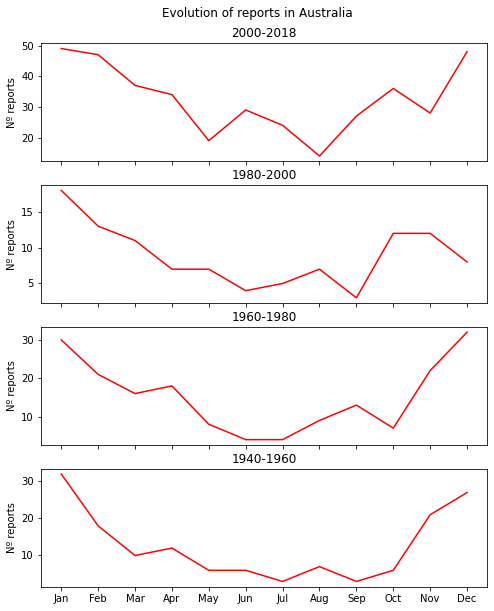

In [76]:
# Plotting
# Let's check the reports by year and month in Australia

fig_month_year_australia, ax = plt.subplots(nrows = 4, ncols = 1, figsize=(8,10)) # preparing the environment: graphs to be filled

fig_month_year_australia.suptitle('Evolution of reports in Australia', y=0.93)

# conditions:
year_2000_2018 = (sharks_clean_australia["Year"] >= 2000)
year_1980_2000 = (sharks_clean_australia["Year"] >= 1980) & (sharks_clean_australia["Year"] < 2000)
year_1960_1980 = (sharks_clean_australia["Year"] >= 1960) & (sharks_clean_australia["Year"] < 1980)
year_1940_1960 = (sharks_clean_australia["Year"] >= 1940) & (sharks_clean_australia["Year"] < 1960)
year_1920_1940 = (sharks_clean_australia["Year"] >= 1920) & (sharks_clean_australia["Year"] < 1940)
year_1900_1920 = (sharks_clean_australia["Year"] >= 1900) & (sharks_clean_australia["Year"] < 1920)

# x axis:
x = sharks_clean_australia.groupby("Month").indices.keys()
  
# y axes:
y1 = sharks_clean_australia[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_australia[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_australia[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_australia[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_australia[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_australia[year_1900_1920].groupby("Month").size()

# 1st
plt.sca(ax[0])
plt.plot(x, y1, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('2000-2018')

# 2nd
plt.sca(ax[1])
plt.plot(x, y2, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1980-2000')

# 3rd
plt.sca(ax[2])
plt.plot(x, y3, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["","","","","","","","","","","",""])
plt.title('1960-1980')

# 4th
plt.sca(ax[3])
plt.plot(x, y4, 'r')
plt.ylabel(ylabel="Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('1940-1960')

# 5th
# plt.sca(ax[4])
# plt.plot(x, y5, 'r')
# plt.ylabel(ylabel="Nº reports")
# plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
# plt.title('1920-1940')

plt.show()
fig_month_year_australia.figure.savefig('./images/month_year_australia.jpg', dpi=1000, bbox_inches='tight')

In [77]:
# Export cleaned dataset for Australia
sharks_clean.to_csv('./data/sharks_clean_month_year_australia.csv', index = False)

### Separating Northern and Southern hemisphere to get more powerful data

In [78]:
# sharks_clean["Country"].unique()

In [79]:
# Creating a list of countries for northern and southern hemispheres:
north = ["USA", "Algeria", "Benin", "Burkina Faso", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Djibouti", 
         "Egypt", "Eritrea", "Ethiopia", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Liberia", "Libya", 
         "Mali", "Mauritania", "Morocco", "Niger", "Nigeria", "Senegal", "Sierra Leone", "South Sudan", "Sudan", "Togo", 
         "Tunisia", "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", 
         "China", "Cyprus", "Georgia", "India", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
         "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", 
         "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Tajikistan", "Thailand",
         "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen", "Belize", "Canada", "Costa Rica", 
         "El Salvador", "Guatemala", "Guyana", "Honduras", "Mexico", "Nicaragua", "Panama", "Suriname", 
         "United States", "Venezuela", "Albania", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
         "Czech Republic", "Denmark", "Estonia", "Finland", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", 
         "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", 
         "Portugal", "Romania", "Russia", "San Marino", "azores", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "ENGLAND", "MALDIVES",
        "BAHAMAS","CUBA",'UNITED KINGDOM',"COLUMBIA", "DOMINICAN REPUBLIC","CAYMAN ISLANDS", "FRANCE","ST. MARTIN","PUERTO RICO","TRINIDAD & TOBAGO","TAIWAN",
        "JAMAICA", "ARUBA", "GUAM", "PALESTINIAN TERRITORIES","SCOTLAND","ANTIGUA","TURKS & CAICOS", "UNITED ARAB EMIRATES (UAE)","SOMALIA",
        "NEVIS","BRITISH VIRGIN ISLANDS", "ST. MAARTIN", "GRAND CAYMAN", "MICRONESIA", "OKINAWA","MARSHALL ISLANDS",
         "EGYPT / ISRAEL","NORTHERN ARABIAN SEA","HONG KONG", "CARIBBEAN SEA","BERMUDA", "SOUTH CHINA SEA","BRITISH ISLES", "PALAU",
        "GRENADA","NEW BRITAIN", "JOHNSTON ISLAND", "RED SEA", "NORTH PACIFIC OCEAN", "FEDERATED STATES OF MICRONESIA",
         "BRITISH WEST INDIES", "PERSIAN GULF", "NORTH SEA", "ANDAMAN / NICOBAR ISLANDAS", "THE BALKANS","NETHERLANDS ANTILLES",
         "NORTH ATLANTIC OCEAN", "NORTHERN MARIANA ISLANDS", "IRAN / IRAQ", "BAY OF BENGAL", "ITALY / CROATIA", "BARBADOS", 
         "HAITI", "WEST INDIES", "BURMA", "MARTINIQUE", "CEYLON", "EQUATORIAL GUINEA / CAMEROON", "TOBAGO"]

south = ["Angola", "Argentina", "Australia", "Bolivia", "Botswana", "Burundi", "Chile", "Comoros", "East Timor", "Eswatini",
         "Fiji", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Nauru", "New Zealand", "Papua New Guinea", 
         "Paraguay", "Peru", "Rwanda", "Samoa", "Seychelles", "Solomon Islands", "South Africa", "Tanzania", "Tuvalu", 
         "Uruguay", "Vanuatu", "Zambia", "Zimbabwe", "new caledonia", "ST HELENA, BRITISH OVERSEAS TERRITORY", "REUNION","INDONESIA", 
         "FRENCH POLYNESIA", "BRAZIL", "KIRIBATI","DIEGO GARCIA","TONGA", "NAMIBIA", "WESTERN SAMOA", "NEW GUINEA", "ADMIRALTY ISLANDS",
        "SOUTH ATLANTIC OCEAN","AMERICAN SAMOA","INDIAN OCEAN", "SOLOMON ISLANDS / VANUATU", "SOUTHWEST PACIFIC OCEAN", 
         "BRITISH NEW GUINEA", "COOK ISLANDS", "TASMAN SEA"]

north = [i.lower() for i in north]
south = [i.lower() for i in south]
print(south)

['angola', 'argentina', 'australia', 'bolivia', 'botswana', 'burundi', 'chile', 'comoros', 'east timor', 'eswatini', 'fiji', 'lesotho', 'madagascar', 'malawi', 'mauritius', 'mozambique', 'nauru', 'new zealand', 'papua new guinea', 'paraguay', 'peru', 'rwanda', 'samoa', 'seychelles', 'solomon islands', 'south africa', 'tanzania', 'tuvalu', 'uruguay', 'vanuatu', 'zambia', 'zimbabwe', 'new caledonia', 'st helena, british overseas territory', 'reunion', 'indonesia', 'french polynesia', 'brazil', 'kiribati', 'diego garcia', 'tonga', 'namibia', 'western samoa', 'new guinea', 'admiralty islands', 'south atlantic ocean', 'american samoa', 'indian ocean', 'solomon islands / vanuatu', 'southwest pacific ocean', 'british new guinea', 'cook islands', 'tasman sea']


In [80]:
sharks_clean['Hemisphere'] = sharks_clean.loc[:, 'Country']

In [81]:
# Not working:
# for i in sharks_clean["Hemisphere"]:
#     i = str(i)
#     i = i.lower()
#     if i in south:
#         print(i)
#         sharks_clean["Hemisphere"] = sharks_clean["Hemisphere"].replace(i, "Southern")

In [82]:
def hemisphere(x):
    if x.lower() in south:
        return "Southern"
    elif x.lower() in north:
        return "Northern"
    else:
        return x

In [83]:
sharks_clean["Hemisphere"] = sharks_clean["Hemisphere"].apply(hemisphere)

In [84]:
sharks_clean["Hemisphere"].unique()

array(['Northern', 'Southern', 'ECUADOR', 'ATLANTIC OCEAN', 'KENYA',
       'PACIFIC OCEAN', 'MID ATLANTIC OCEAN', 'GABON', 'CENTRAL PACIFIC',
       'INDIAN OCEAN?', 'AFRICA', 'COAST OF AFRICA',
       'BETWEEN PORTUGAL & INDIA'], dtype=object)

In [85]:
# Export cleaned dataset for Hemisphere:
sharks_clean.to_csv('./data/sharks_clean_month_year_hemisphere.csv', index = False)

In [86]:
#sharks_clean["Hemisphere"] = sharks_clean["Hemisphere"].apply(lambda x: "Southern" if x.lower() in south else x)

In [87]:
# Creating a new dataframe for southern and northern hemispheres:
# south: 
country_southern = sharks_clean['Hemisphere'] != "Southern"
sharks_clean_southern = sharks_clean.drop(sharks_clean[country_southern].index)

# north:
country_northern = sharks_clean['Hemisphere'] != "Northern"
sharks_clean_northern = sharks_clean.drop(sharks_clean[country_northern].index)

In [88]:
sharks_clean_southern.shape

(2365, 18)

In [89]:
sharks_clean_southern.to_csv('./data/sharks_clean_month_year_southern.csv', index = False)

In [90]:
sharks_clean_northern.shape

(2931, 18)

In [91]:
sharks_clean_northern.to_csv('./data/sharks_clean_month_year_northern.csv', index = False)

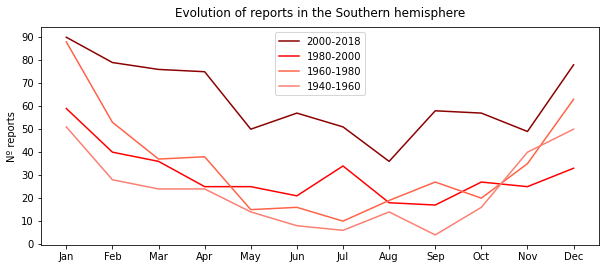

In [92]:
# other way of showing the graph: SOUTHERN

fig_month_year_southern, ax = plt.subplots(figsize=(10,4))

# conditions:
year_2000_2018 = (sharks_clean_southern["Year"] >= 2000)
year_1980_2000 = (sharks_clean_southern["Year"] >= 1980) & (sharks_clean_southern["Year"] < 2000)
year_1960_1980 = (sharks_clean_southern["Year"] >= 1960) & (sharks_clean_southern["Year"] < 1980)
year_1940_1960 = (sharks_clean_southern["Year"] >= 1940) & (sharks_clean_southern["Year"] < 1960)
year_1920_1940 = (sharks_clean_southern["Year"] >= 1920) & (sharks_clean_southern["Year"] < 1940)
year_1900_1920 = (sharks_clean_southern["Year"] >= 1900) & (sharks_clean_southern["Year"] < 1920)

# y axis
y1 = sharks_clean_southern[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_southern[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_southern[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_southern[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_southern[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_southern[year_1900_1920].groupby("Month").size()

# pretty
ax.plot(y1, color = 'darkred', label = '2000-2018')
ax.plot(y2, color = 'red', label = '1980-2000')
ax.plot(y3, color = 'tomato', label = '1960-1980')
ax.plot(y4, color = 'salmon', label = '1940-1960')

ax.legend(loc = 'upper center')
plt.yticks(ticks = range(0,100,10))
plt.ylabel(ylabel = "Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('Evolution of reports in the Southern hemisphere', y = 1.02)

plt.show()
fig_month_year_southern.figure.savefig('./images/month_year_southern.jpg', dpi=1000, bbox_inches='tight')

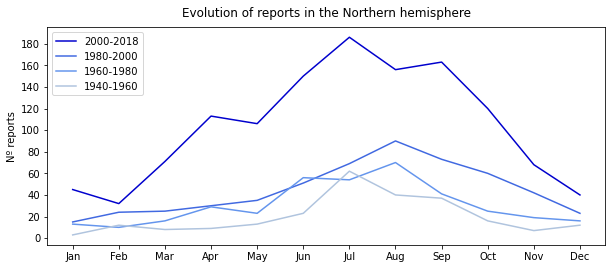

In [93]:
# for northern

fig_month_year_northern, ax = plt.subplots(figsize=(10,4))

# conditions:
year_2000_2018 = (sharks_clean_northern["Year"] >= 2000)
year_1980_2000 = (sharks_clean_northern["Year"] >= 1980) & (sharks_clean_northern["Year"] < 2000)
year_1960_1980 = (sharks_clean_northern["Year"] >= 1960) & (sharks_clean_northern["Year"] < 1980)
year_1940_1960 = (sharks_clean_northern["Year"] >= 1940) & (sharks_clean_northern["Year"] < 1960)
year_1920_1940 = (sharks_clean_northern["Year"] >= 1920) & (sharks_clean_northern["Year"] < 1940)
year_1900_1920 = (sharks_clean_northern["Year"] >= 1900) & (sharks_clean_northern["Year"] < 1920)

y1 = sharks_clean_northern[year_2000_2018].groupby("Month").size()
y2 = sharks_clean_northern[year_1980_2000].groupby("Month").size()
y3 = sharks_clean_northern[year_1960_1980].groupby("Month").size()
y4 = sharks_clean_northern[year_1940_1960].groupby("Month").size()
y5 = sharks_clean_northern[year_1920_1940].groupby("Month").size()
y6 = sharks_clean_northern[year_1900_1920].groupby("Month").size()

ax.plot(y1, color = 'mediumblue', label = '2000-2018')
ax.plot(y2, color = 'royalblue', label = '1980-2000')
ax.plot(y3, color = 'cornflowerblue', label = '1960-1980')
ax.plot(y4, color = 'lightsteelblue', label = '1940-1960')

ax.legend(loc = 'upper left')

plt.yticks(ticks = range(0,190,20))
plt.ylabel(ylabel = "Nº reports")
plt.xticks(ticks = range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('Evolution of reports in the Northern hemisphere', y = 1.02)

plt.show()
fig_month_year_northern.figure.savefig('./images/month_year_northern.jpg', dpi=1000, bbox_inches='tight')

## Demographics

### Age distribution and Fatality

In [94]:
# Importing
sharks_clean_age = pd.read_csv('./data/sharks_clean_activity_fatal.csv', encoding = "unicode_escape")

In [95]:
# Checking Nan
sharks_clean_age["Age"].isna().sum()

2180

In [96]:
# Keeping not Nan
sharks_clean_age = sharks_clean_age[sharks_clean_age["Age"].notna()]

In [97]:
# Transform to string each age value
sharks_clean_age["Age"] = sharks_clean_age["Age"].map(str)

In [98]:
# Strip to remove spaces and group
sharks_clean_age["Age"] = sharks_clean_age["Age"].str.strip()

In [99]:
# Having a look
sharks_clean_age["Age"].value_counts()

18          135
19          134
17          134
15          134
16          129
           ... 
75            1
21 or 26      1
>50           1
18 to 22      1
13 or 14      1
Name: Age, Length: 138, dtype: int64

In [100]:
# Will have to regex
list_age = sharks_clean_age["Age"].tolist()

In [101]:
# print(list_age)

In [102]:
# Extracting in new column the ages using regex
sharks_clean_age["Age_regex"] = sharks_clean_age["Age"].str.extract(r'(\d{1,2})')

In [103]:
# sharks_clean["Age_regex"].value_counts()

In [104]:
# Checking Nan again (extracted if not regex match)
sharks_clean_age["Age_regex"].isna().sum()

26

In [105]:
# Removing new Nan 
sharks_clean_age = sharks_clean_age[sharks_clean_age['Age_regex'].notna()]
sharks_clean_age["Age_regex"].isna().sum()

0

In [106]:
# Transform age back to int
sharks_clean_age["Age_regex"] = sharks_clean_age["Age_regex"].map(int)

In [107]:
# Statistics summary
sharks_clean_age["Age_regex"].describe()

count    3100.000000
mean       27.314194
std        13.813303
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age_regex, dtype: float64

In [108]:
# Checking unique
sharks_clean_age["Fatal (Y/N)"].unique()

array(['N', 'Y'], dtype=object)

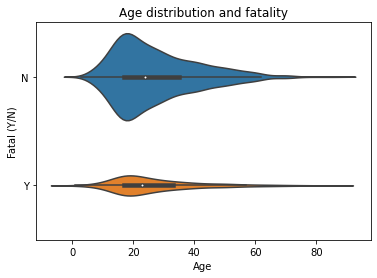

In [109]:
# Plotting
age_violin = sns.violinplot(x = "Age_regex", y = "Fatal (Y/N)", data = sharks_clean_age, scale="count")
age_violin.set(title='Age distribution and fatality')
age_violin.set_xlabel("Age")

plt.savefig('./images/age_fatality.jpg', dpi=1000, bbox_inches='tight')

### Gender and Fatality

In [110]:
# Importing
sharks_clean_gender = pd.read_csv('./data/sharks_clean_activity_fatal.csv', encoding = "unicode_escape")

In [111]:
# Checking Nan
sharks_clean_gender["Sex"].isna().sum()

362

In [112]:
# Keeping not Nan
sharks_clean_gender = sharks_clean_gender[sharks_clean_gender["Sex"].notna()]

In [113]:
# Cleaning by striping spaces
sharks_clean_gender["Sex"] = sharks_clean_gender["Sex"].str.strip()
sharks_clean_gender["Sex"].value_counts()

M      4403
F       537
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [114]:
# Keeping only M and F
gender_keep = (sharks_clean_gender["Sex"] == "M") | (sharks_clean_gender["Sex"] == "F")
sharks_clean_gender = sharks_clean_gender[gender_keep]
sharks_clean_gender["Sex"].value_counts()

M    4403
F     537
Name: Sex, dtype: int64

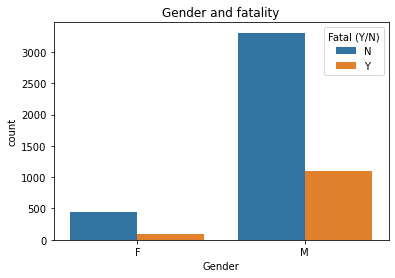

In [115]:
# Plotting
fig_gender_fatal = sns.countplot(data=sharks_clean_gender, x="Sex", hue="Fatal (Y/N)")
fig_gender_fatal.set(title='Gender and fatality')
fig_gender_fatal.set_xlabel("Gender")

plt.savefig('./images/gender_fatality.jpg', dpi=1000, bbox_inches='tight')

## Fatality vs Time

In [116]:
# Importing
# sharks_clean = pd.read_csv('./data/sharks_clean.csv', encoding = "unicode_escape")

In [117]:
# Removing NaNs
# sharks_clean = sharks_clean[sharks_clean['Fatal (Y/N)'].notna()]
# sharks_clean = sharks_clean[sharks_clean['Time'].notna()]
# print("Fatal NaN:", sharks_clean["Fatal (Y/N)"].isna().sum(), 
#       "Time NaN:", sharks_clean["Time"].isna().sum())

In [118]:
# Cleaning/grouping, Fatality:
# sharks_clean["Fatal (Y/N)"] = sharks_clean["Fatal (Y/N)"].str.strip().str.upper()
# fatal_remove = (sharks_clean["Fatal (Y/N)"] == "M") | (sharks_clean["Fatal (Y/N)"] == "UNKNOWN") | (sharks_clean["Fatal (Y/N)"] == "2017")
# sharks_clean = sharks_clean.drop(sharks_clean[fatal_remove].index)
# sharks_clean["Fatal (Y/N)"].value_counts()

In [119]:
# Cleaning/grouping, Time:
# sharks_clean["Time"].value_counts().head()

In [120]:
# sharks_clean["Time"] = sharks_clean["Time"].str.strip().str.lower()

In [121]:
# list_time = sharks_clean["Time"].tolist()

In [122]:
# print(list_time)

In [123]:
# sharks_clean.to_csv('./data/sharks_clean_fatal_time.csv', index = False)